In [2]:
import json
import seaborn as sns
import pandas as pd
from dataclasses import make_dataclass
import typing as t
from dacite import from_dict

In [5]:
def load_document(path):
    with open(path, "r") as f:
        return json.load(f)
    
def load_avg_data_as_df(path):
    kde_data = load_document(path)
    Record = make_dataclass('Record', [('record_id', int),('index_type', str),('k', int), ('sigma', float), ('m', int), ('scale', str), ('accuracy', float)])
    data = []
    for i,it in enumerate(kde_data):
        record_id=i
        index_type=it['index_type']
        if 'k' in it['parameters']:
            k=it['parameters']['k']
        else:
            k=None
        if 'm' in it['parameters']:
            m=it['parameters']['m']
        else: 
            m=None
        s=None
        for scale,acc in it['accuracy'].items():
            if scale in ('1m', '5m'):
                continue
            data.append(Record(record_id, index_type,k,s,m,scale,acc))
    return pd.DataFrame(data)

,record_id,index_type,k,sigma,m,scale,accuracy
0,0,cosine,2,None,None,10m,0.010490
1,0,cosine,2,None,None,100m,0.114510
2,0,cosine,2,None,None,500m,0.284528
3,0,cosine,2,None,None,1km,0.403846
4,0,cosine,2,None,None,5km,0.611888
...,...,...,...,...,...,...,...
105,21,L2,100,None,None,10m,0.000000
106,21,L2,100,None,None,100m,0.015734
107,21,L2,100,None,None,500m,0.123252
108,21,L2,100,None,None,1km,0.161713


# Average

In [11]:
path = '/home/andrew/Documents/study/thesis/thesis-src/experiments/localisation_tuning/V2_0__avg_tuning/tuning_results.json'
df_avg=load_avg_data_as_df(path)
df_avg=df_avg.drop(['sigma', 'm'], axis=1)
df_avg

,record_id,index_type,k,scale,accuracy
0,0,cosine,2,10m,0.010490
1,0,cosine,2,100m,0.114510
2,0,cosine,2,500m,0.284528
3,0,cosine,2,1km,0.403846
4,0,cosine,2,5km,0.611888
...,...,...,...,...,...
105,21,L2,100,10m,0.000000
106,21,L2,100,100m,0.015734
107,21,L2,100,500m,0.123252
108,21,L2,100,1km,0.161713


## L2 index

In [14]:
df_avg_l2 = df_avg[df_avg['index_type']=='L2']

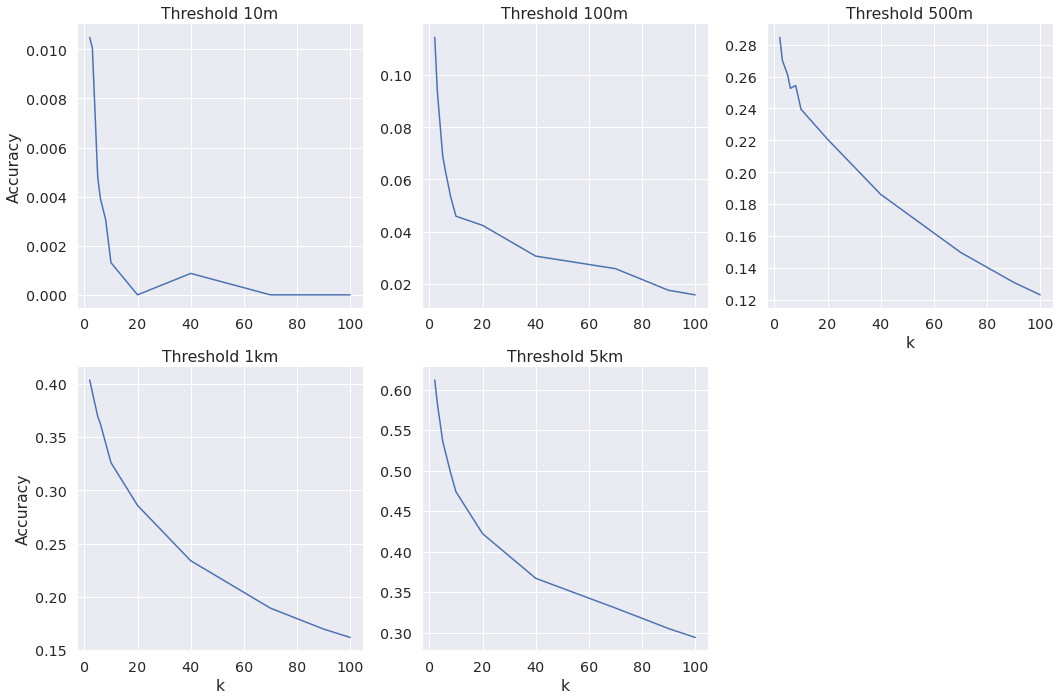

In [42]:
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

g= sns.relplot(
    data=df_avg_l2,
    x='k', y='accuracy', col='scale', col_wrap=3,
    kind='line', facet_kws={'sharey':False, 'sharex':False},
    palette=sns.color_palette('tab10',7),
)

g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_avg_l2.eps', format='eps',bbox_inches='tight')

In [38]:
max_accuracy = df_avg_l2.groupby(['scale'])['accuracy'].transform(max) == df_avg_l2['accuracy']
df_avg_l2[max_accuracy]

,record_id,index_type,k,scale,accuracy
55,11,L2,2,10m,0.010490
56,11,L2,2,100m,0.114510
57,11,L2,2,500m,0.284528
58,11,L2,2,1km,0.403846
59,11,L2,2,5km,0.611888


## Cosine index

In [24]:
df_avg_cos = df_avg[df_avg['index_type']=='cosine']

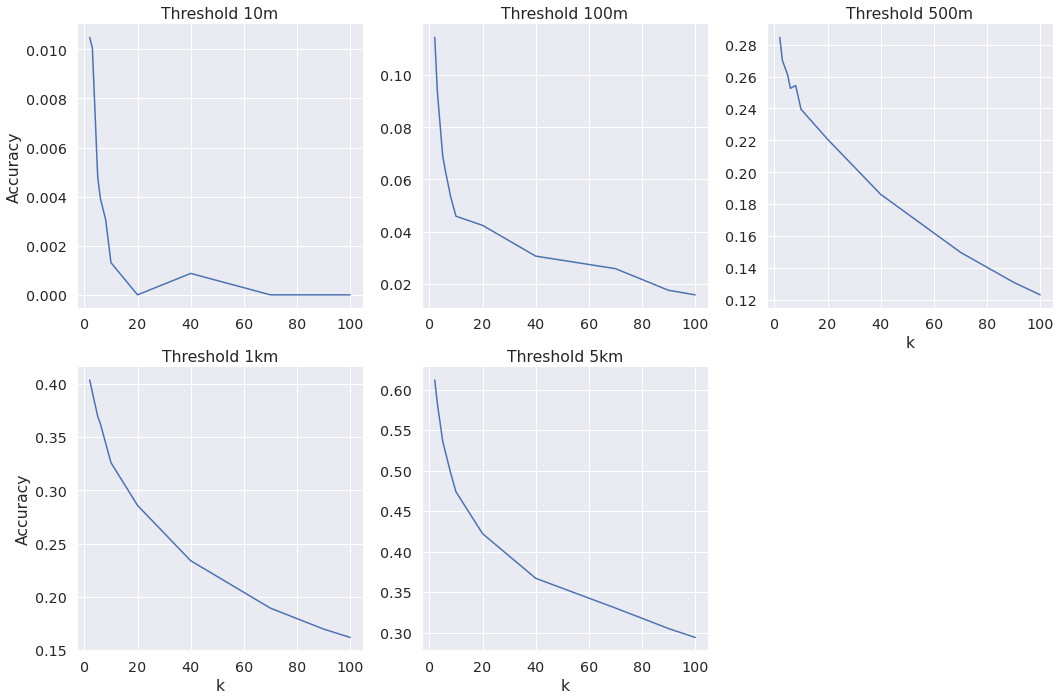

In [43]:
g= sns.relplot(
    data=df_avg_cos,
    x='k', y='accuracy', col='scale', col_wrap=3,
    kind='line', facet_kws={'sharey':False, 'sharex':False},
    palette=sns.color_palette('tab10',7),
)

g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_avg_cos.eps', format='eps',bbox_inches='tight')

In [46]:
max_accuracy = df_avg_cos.groupby(['scale'])['accuracy'].transform(max) == df_avg_cos['accuracy']
df_avg_cos[max_accuracy]

,record_id,index_type,k,scale,accuracy
0,0,cosine,2,10m,0.010490
1,0,cosine,2,100m,0.114510
2,0,cosine,2,500m,0.284528
3,0,cosine,2,1km,0.403846
4,0,cosine,2,5km,0.611888


# Weighted average

In [29]:
path = '/home/andrew/Documents/study/thesis/thesis-src/experiments/localisation_tuning/V3_0__wavg_tuning/tuning_results.json'
df_wavg=load_avg_data_as_df(path)
df_wavg=df_wavg.drop('sigma', axis=1)
df_wavg

,record_id,index_type,k,m,scale,accuracy
0,0,cosine,2,1,10m,0.010052
1,0,cosine,2,1,100m,0.114510
2,0,cosine,2,1,500m,0.285402
3,0,cosine,2,1,1km,0.403846
4,0,cosine,2,1,5km,0.611888
...,...,...,...,...,...,...
1095,219,L2,100,15,10m,0.002185
1096,219,L2,100,15,100m,0.053322
1097,219,L2,100,15,500m,0.188811
1098,219,L2,100,15,1km,0.262238


## L2 index

In [30]:
df_wavg_l2 = df_wavg[df_wavg['index_type']=='L2']

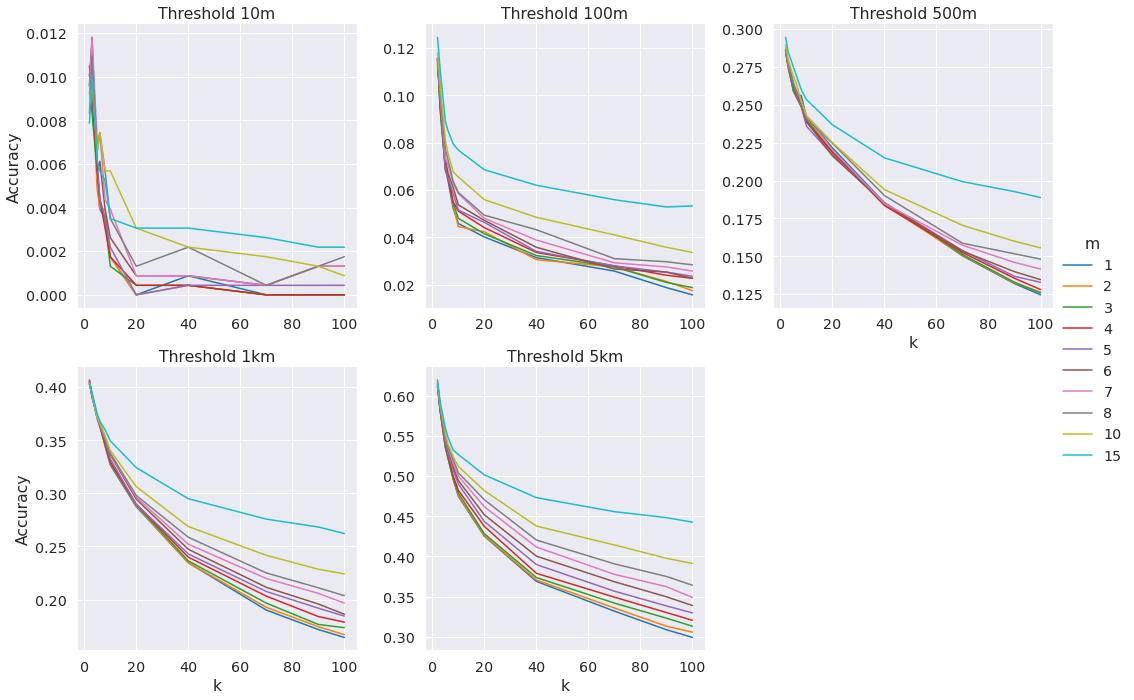

In [44]:
g= sns.relplot(
    data=df_wavg_l2,
    x='k', y='accuracy', col='scale', hue='m', col_wrap=3,
    kind='line', facet_kws={'sharey':False, 'sharex':False},
    palette=sns.color_palette('tab10',10),
)
g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_wavg_l2.eps', format='eps',bbox_inches='tight')

In [40]:
max_accuracy = df_wavg_l2.groupby(['scale'])['accuracy'].transform(max) == df_wavg_l2['accuracy']
df_wavg_l2[max_accuracy]

,record_id,index_type,k,m,scale,accuracy
573,114,L2,2,5,1km,0.406906
596,119,L2,2,15,100m,0.124563
597,119,L2,2,15,500m,0.294580
599,119,L2,2,15,5km,0.620192
625,125,L2,3,6,10m,0.011801
630,126,L2,3,7,10m,0.011801


## Cosine 

In [35]:
df_wavg_cos = df_wavg[df_wavg['index_type']=='cosine']

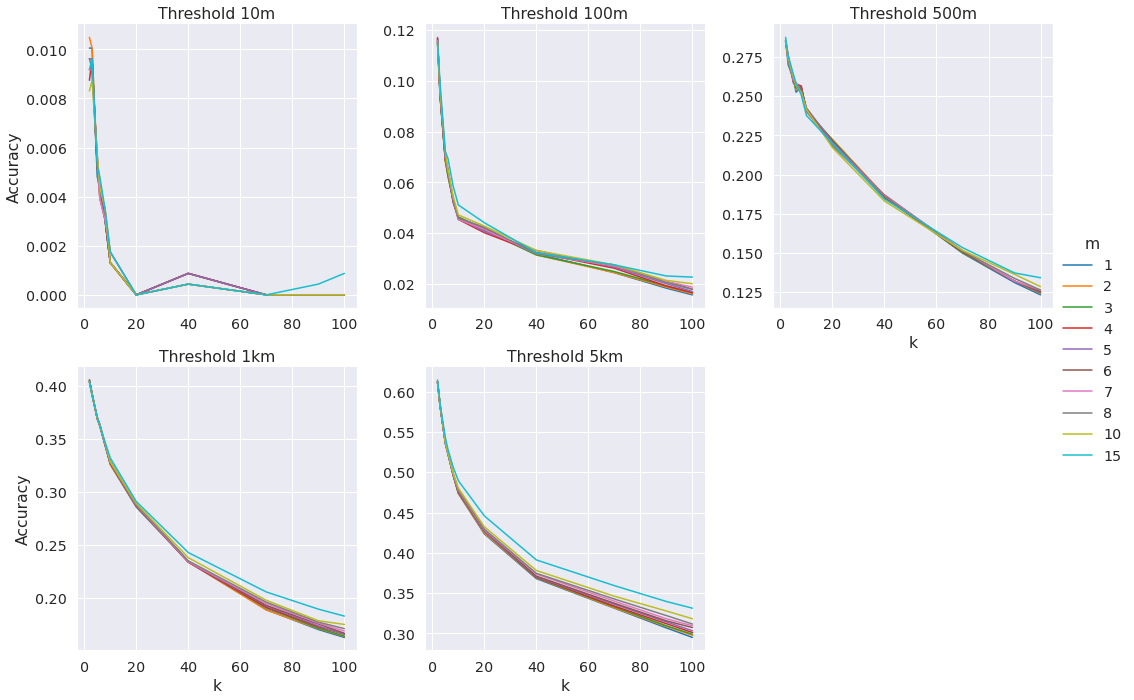

In [45]:
g= sns.relplot(
    data=df_wavg_cos,
    x='k', y='accuracy', col='scale', hue='m', col_wrap=3,
    kind='line', facet_kws={'sharey':False, 'sharex':False},
    palette=sns.color_palette('tab10',10),
)
g.set_titles(col_template="Threshold {col_name}")
g.set_axis_labels(y_var='Accuracy')
g.savefig('/home/andrew/Documents/study/thesis/thesis-images/4-baseline/param_selection_wavg_cos.eps', format='eps',bbox_inches='tight')

In [41]:
max_accuracy = df_wavg_cos.groupby(['scale'])['accuracy'].transform(max) == df_wavg_cos['accuracy']
df_wavg_cos[max_accuracy]

,record_id,index_type,k,m,scale,accuracy
5,1,cosine,2,2,10m,0.010490
13,2,cosine,2,3,1km,0.405594
18,3,cosine,2,4,1km,0.405594
21,4,cosine,2,5,100m,0.117133
47,9,cosine,2,15,500m,0.287587
49,9,cosine,2,15,5km,0.614510
